In [1]:
# https://towardsdatascience.com/simple-logistic-regression-using-python-scikit-learn-86bf984f61f1

In [2]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Modbus.csv")
df.head()

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection


In [3]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                           count  percentage
ts                             0         0.0
date                           0         0.0
time                           0         0.0
FC1_Read_Input_Register        0         0.0
FC2_Read_Discrete_Value        0         0.0
FC3_Read_Holding_Register      0         0.0
FC4_Read_Coil                  0         0.0
label                          0         0.0
type                           0         0.0


In [4]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)


True
               ts       date        time  FC1_Read_Input_Register  \
1      1556208840  25-Apr-19   09:14:00                     49389   
9      1556208850  25-Apr-19   09:14:10                     57147   
19     1556208860  25-Apr-19   09:14:20                     16992   
24     1556208865  25-Apr-19   09:14:25                     57110   
29     1556208870  25-Apr-19   09:14:30                      5523   
...           ...        ...         ...                      ...   
42647  1554202943   2-Apr-19     4:02:23                    46650   
42648  1554202943   2-Apr-19     4:02:23                    46650   
42650  1554202943   2-Apr-19     4:02:23                    53773   
42651  1554202943   2-Apr-19     4:02:23                    53773   
42652  1554202943   2-Apr-19     4:02:23                    53773   

       FC2_Read_Discrete_Value  FC3_Read_Holding_Register  FC4_Read_Coil  \
1                        52921                      25770          13625   
9             

In [5]:
type('date')

str

In [6]:
type('time')

str

In [7]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time  FC1_Read_Input_Register  \
0      1556208840 2019-04-25   09:14:00                     49389   
2      1556208841 2019-04-25   09:14:01                     49389   
3      1556208842 2019-04-25   09:14:02                     49389   
4      1556208844 2019-04-25   09:14:04                     40665   
5      1556208846 2019-04-25   09:14:06                     40665   
...           ...        ...         ...                      ...   
51101  1554183533 2019-04-01   22:38:53                     62602   
51102  1554183536 2019-04-01   22:38:56                     62602   
51103  1554183537 2019-04-01   22:38:57                       198   
51104  1554183538 2019-04-01   22:38:58                       198   
51105  1554183541 2019-04-01   22:39:01                       198   

       FC2_Read_Discrete_Value  FC3_Read_Holding_Register  FC4_Read_Coil  \
0                        52921                      25770          13625   
2                  

In [8]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [9]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [10]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [11]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [12]:
df['month'] = df['month'].astype(int)

In [13]:
df['hour'] = df['hour'].astype(int)

In [14]:
df.month.unique()

array([4, 3])

In [15]:
df.hour.unique()

array([ 9, 10, 11, 12,  6,  7,  8, 13, 14, 15, 23, 18, 19, 20, 21, 22,  5,
        4, 16, 17])

In [16]:
import numpy as np
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [17]:
df

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556208840,2019-04-25,09:14:00,49389,52921,25770,13625,1,injection,2019,4,Thursday,9,14,00,0.866025,-0.500000,1.0,6.123234e-17
2,1556208841,2019-04-25,09:14:01,49389,52921,25770,13625,1,injection,2019,4,Thursday,9,14,01,0.866025,-0.500000,1.0,6.123234e-17
3,1556208842,2019-04-25,09:14:02,49389,52921,25770,13625,1,injection,2019,4,Thursday,9,14,02,0.866025,-0.500000,1.0,6.123234e-17
4,1556208844,2019-04-25,09:14:04,40665,44748,21098,35371,1,injection,2019,4,Thursday,9,14,04,0.866025,-0.500000,1.0,6.123234e-17
5,1556208846,2019-04-25,09:14:06,40665,44748,21098,35371,1,injection,2019,4,Thursday,9,14,06,0.866025,-0.500000,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1554183533,2019-04-01,22:38:53,62602,1253,12772,29319,0,normal,2019,4,Monday,22,38,53,-0.707107,0.707107,1.0,6.123234e-17
51102,1554183536,2019-04-01,22:38:56,62602,1253,12772,29319,0,normal,2019,4,Monday,22,38,56,-0.707107,0.707107,1.0,6.123234e-17
51103,1554183537,2019-04-01,22:38:57,198,38266,33649,44594,0,normal,2019,4,Monday,22,38,57,-0.707107,0.707107,1.0,6.123234e-17
51104,1554183538,2019-04-01,22:38:58,198,38266,33649,44594,0,normal,2019,4,Monday,22,38,58,-0.707107,0.707107,1.0,6.123234e-17


In [18]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                           count  percentage
ts                             0         0.0
date                           0         0.0
time                           0         0.0
FC1_Read_Input_Register        0         0.0
FC2_Read_Discrete_Value        0         0.0
FC3_Read_Holding_Register      0         0.0
FC4_Read_Coil                  0         0.0
label                          0         0.0
type                           0         0.0
year                           0         0.0
month                          0         0.0
day_name                       0         0.0
hour                           0         0.0
min                            0         0.0
sec                            0         0.0
hour_sin                       0         0.0
hour_cos                       0         0.0
month_sin                      0         0.0
month_cos                      0         0.0


In [19]:
# drop columns 
df = df.drop(['ts', 'time','label','date','min','sec','hour','month'], axis=1)

In [20]:
df

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,type,year,day_name,hour_sin,hour_cos,month_sin,month_cos
0,49389,52921,25770,13625,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
2,49389,52921,25770,13625,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
3,49389,52921,25770,13625,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
4,40665,44748,21098,35371,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
5,40665,44748,21098,35371,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
51101,62602,1253,12772,29319,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17
51102,62602,1253,12772,29319,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17
51103,198,38266,33649,44594,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17
51104,198,38266,33649,44594,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17


In [21]:
# transform int to string
#df['label'] = df['label'].astype(str)

In [22]:
#df['thermostat_status'] = df['thermostat_status'].astype(str)

In [23]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [24]:
num_list


['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'year',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [25]:
cat_list

['type', 'day_name']

In [26]:
### 2. Feature Engineering and EDA  ###

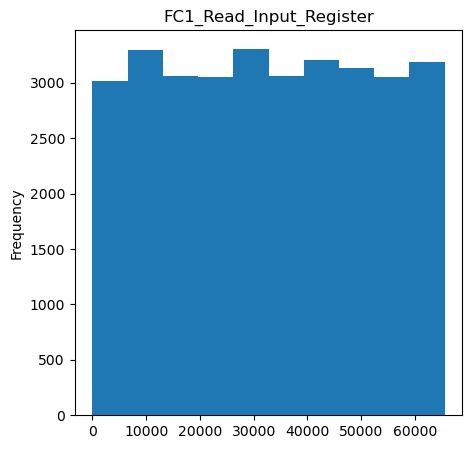

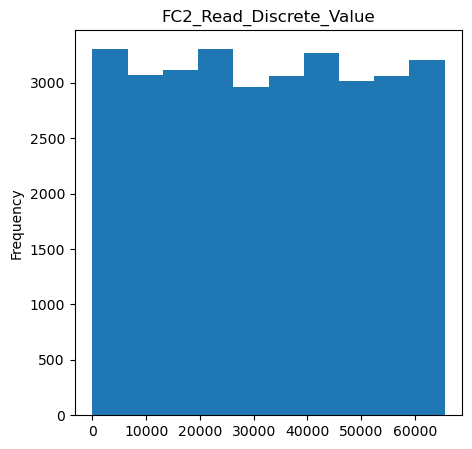

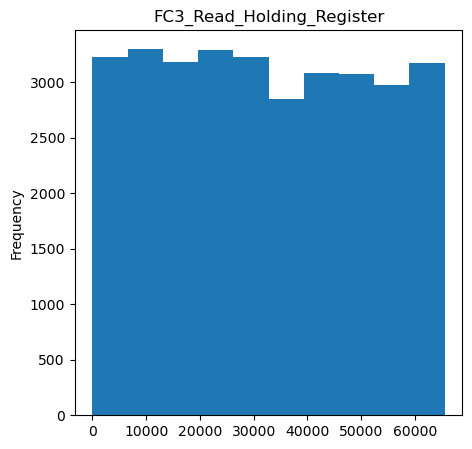

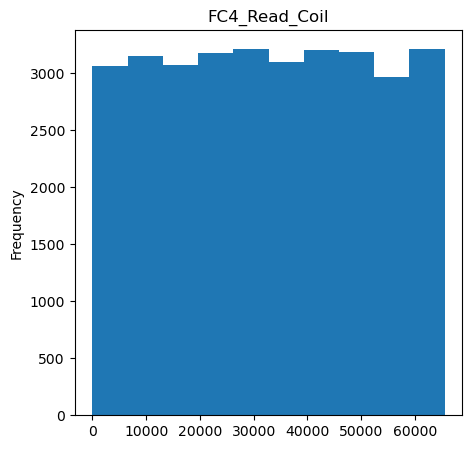

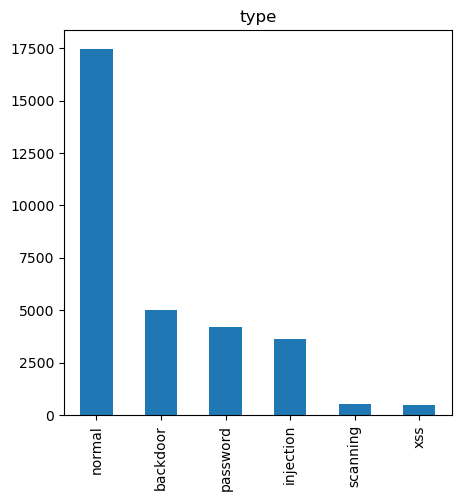

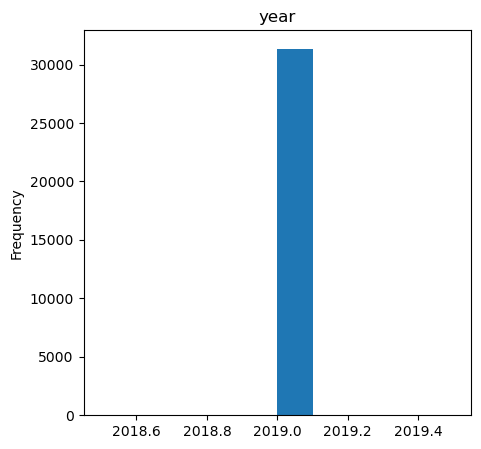

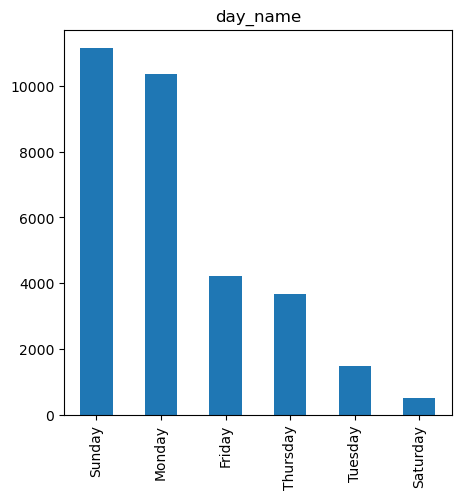

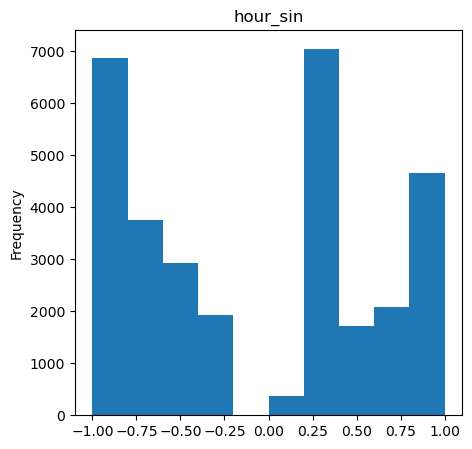

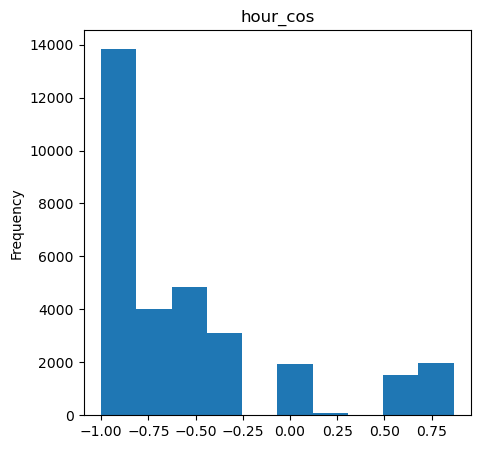

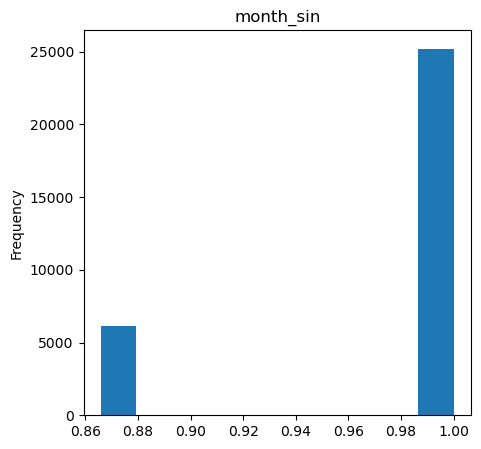

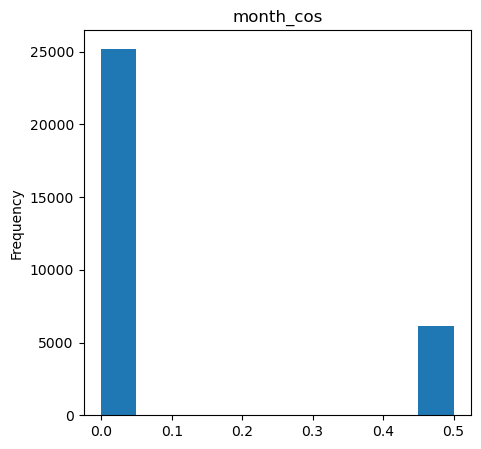

In [27]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [28]:
df

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,type,year,day_name,hour_sin,hour_cos,month_sin,month_cos
0,49389,52921,25770,13625,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
2,49389,52921,25770,13625,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
3,49389,52921,25770,13625,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
4,40665,44748,21098,35371,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
5,40665,44748,21098,35371,injection,2019,Thursday,0.866025,-0.500000,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
51101,62602,1253,12772,29319,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17
51102,62602,1253,12772,29319,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17
51103,198,38266,33649,44594,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17
51104,198,38266,33649,44594,normal,2019,Monday,-0.707107,0.707107,1.0,6.123234e-17


In [29]:
df['type'].value_counts()

normal       17476
backdoor      5000
password      4203
injection     3656
scanning       529
xss            498
Name: type, dtype: int64

In [30]:
# encoding categorical data using dummies
#from sklearn.preprocessing import LabelEncoder
#categorical_features = ['type']
#for i in categorical_features:
 #  df[i] = LabelEncoder().fit_transform(df[i])

In [31]:
df['type'].value_counts()

normal       17476
backdoor      5000
password      4203
injection     3656
scanning       529
xss            498
Name: type, dtype: int64

In [32]:
import category_encoders as ce

encoder= ce.BinaryEncoder(cols=['day_name','FC2_Read_Discrete_Value','FC1_Read_Input_Register','FC3_Read_Holding_Register','FC4_Read_Coil' ],return_df=True)


In [33]:
df=encoder.fit_transform(df) 
df

,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,FC1_Read_Input_Register_3,FC1_Read_Input_Register_4,FC1_Read_Input_Register_5,FC1_Read_Input_Register_6,FC1_Read_Input_Register_7,FC1_Read_Input_Register_8,FC1_Read_Input_Register_9,...,FC4_Read_Coil_13,type,year,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos
0,0,0,0,0,0,0,0,0,0,0,...,1,injection,2019,0,0,1,0.866025,-0.500000,1.0,6.123234e-17
2,0,0,0,0,0,0,0,0,0,0,...,1,injection,2019,0,0,1,0.866025,-0.500000,1.0,6.123234e-17
3,0,0,0,0,0,0,0,0,0,0,...,1,injection,2019,0,0,1,0.866025,-0.500000,1.0,6.123234e-17
4,0,0,0,0,0,0,0,0,0,0,...,0,injection,2019,0,0,1,0.866025,-0.500000,1.0,6.123234e-17
5,0,0,0,0,0,0,0,0,0,0,...,0,injection,2019,0,0,1,0.866025,-0.500000,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1,1,0,0,0,0,1,0,1,1,...,0,normal,2019,1,1,0,-0.707107,0.707107,1.0,6.123234e-17
51102,1,1,0,0,0,0,1,0,1,1,...,0,normal,2019,1,1,0,-0.707107,0.707107,1.0,6.123234e-17
51103,1,1,0,0,0,0,1,0,1,1,...,1,normal,2019,1,1,0,-0.707107,0.707107,1.0,6.123234e-17
51104,1,1,0,0,0,0,1,0,1,1,...,1,normal,2019,1,1,0,-0.707107,0.707107,1.0,6.123234e-17


In [34]:
df = df[['FC1_Read_Input_Register_0',
 'FC1_Read_Input_Register_1',
 'FC1_Read_Input_Register_2',
 'FC1_Read_Input_Register_3',
 'FC1_Read_Input_Register_4',
 'FC1_Read_Input_Register_5',
 'FC1_Read_Input_Register_6',
 'FC1_Read_Input_Register_7',
 'FC1_Read_Input_Register_8',
 'FC1_Read_Input_Register_9',
 'FC1_Read_Input_Register_10',
 'FC1_Read_Input_Register_11',
 'FC1_Read_Input_Register_12',
 'FC1_Read_Input_Register_13',
 'FC2_Read_Discrete_Value_0',
 'FC2_Read_Discrete_Value_1',
 'FC2_Read_Discrete_Value_2',
 'FC2_Read_Discrete_Value_3',
 'FC2_Read_Discrete_Value_4',
 'FC2_Read_Discrete_Value_5',
 'FC2_Read_Discrete_Value_6',
 'FC2_Read_Discrete_Value_7',
 'FC2_Read_Discrete_Value_8',
 'FC2_Read_Discrete_Value_9',
 'FC2_Read_Discrete_Value_10',
 'FC2_Read_Discrete_Value_11',
 'FC2_Read_Discrete_Value_12',
 'FC2_Read_Discrete_Value_13',
 'FC3_Read_Holding_Register_0',
 'FC3_Read_Holding_Register_1',
 'FC3_Read_Holding_Register_2',
 'FC3_Read_Holding_Register_3',
 'FC3_Read_Holding_Register_4',
 'FC3_Read_Holding_Register_5',
 'FC3_Read_Holding_Register_6',
 'FC3_Read_Holding_Register_7',
 'FC3_Read_Holding_Register_8',
 'FC3_Read_Holding_Register_9',
 'FC3_Read_Holding_Register_10',
 'FC3_Read_Holding_Register_11',
 'FC3_Read_Holding_Register_12',
 'FC3_Read_Holding_Register_13',
 'FC4_Read_Coil_0',
 'FC4_Read_Coil_1',
 'FC4_Read_Coil_2',
 'FC4_Read_Coil_3',
 'FC4_Read_Coil_4',
 'FC4_Read_Coil_5',
 'FC4_Read_Coil_6',
 'FC4_Read_Coil_7',
 'FC4_Read_Coil_8',
 'FC4_Read_Coil_9',
 'FC4_Read_Coil_10',
 'FC4_Read_Coil_11',
 'FC4_Read_Coil_12',
 'FC4_Read_Coil_13',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','type']]

In [35]:
df

,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,FC1_Read_Input_Register_3,FC1_Read_Input_Register_4,FC1_Read_Input_Register_5,FC1_Read_Input_Register_6,FC1_Read_Input_Register_7,FC1_Read_Input_Register_8,FC1_Read_Input_Register_9,...,FC4_Read_Coil_12,FC4_Read_Coil_13,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos,type
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1,1,0,0,0,0,1,0,1,1,...,1,0,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal
51102,1,1,0,0,0,0,1,0,1,1,...,1,0,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal
51103,1,1,0,0,0,0,1,0,1,1,...,1,1,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal
51104,1,1,0,0,0,0,1,0,1,1,...,1,1,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal


In [36]:
list(df.columns)

['FC1_Read_Input_Register_0',
 'FC1_Read_Input_Register_1',
 'FC1_Read_Input_Register_2',
 'FC1_Read_Input_Register_3',
 'FC1_Read_Input_Register_4',
 'FC1_Read_Input_Register_5',
 'FC1_Read_Input_Register_6',
 'FC1_Read_Input_Register_7',
 'FC1_Read_Input_Register_8',
 'FC1_Read_Input_Register_9',
 'FC1_Read_Input_Register_10',
 'FC1_Read_Input_Register_11',
 'FC1_Read_Input_Register_12',
 'FC1_Read_Input_Register_13',
 'FC2_Read_Discrete_Value_0',
 'FC2_Read_Discrete_Value_1',
 'FC2_Read_Discrete_Value_2',
 'FC2_Read_Discrete_Value_3',
 'FC2_Read_Discrete_Value_4',
 'FC2_Read_Discrete_Value_5',
 'FC2_Read_Discrete_Value_6',
 'FC2_Read_Discrete_Value_7',
 'FC2_Read_Discrete_Value_8',
 'FC2_Read_Discrete_Value_9',
 'FC2_Read_Discrete_Value_10',
 'FC2_Read_Discrete_Value_11',
 'FC2_Read_Discrete_Value_12',
 'FC2_Read_Discrete_Value_13',
 'FC3_Read_Holding_Register_0',
 'FC3_Read_Holding_Register_1',
 'FC3_Read_Holding_Register_2',
 'FC3_Read_Holding_Register_3',
 'FC3_Read_Holding_Regis

In [37]:
df

,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,FC1_Read_Input_Register_3,FC1_Read_Input_Register_4,FC1_Read_Input_Register_5,FC1_Read_Input_Register_6,FC1_Read_Input_Register_7,FC1_Read_Input_Register_8,FC1_Read_Input_Register_9,...,FC4_Read_Coil_12,FC4_Read_Coil_13,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos,type
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.866025,-0.500000,1.0,6.123234e-17,injection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1,1,0,0,0,0,1,0,1,1,...,1,0,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal
51102,1,1,0,0,0,0,1,0,1,1,...,1,0,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal
51103,1,1,0,0,0,0,1,0,1,1,...,1,1,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal
51104,1,1,0,0,0,0,1,0,1,1,...,1,1,1,1,0,-0.707107,0.707107,1.0,6.123234e-17,normal


<AxesSubplot:>

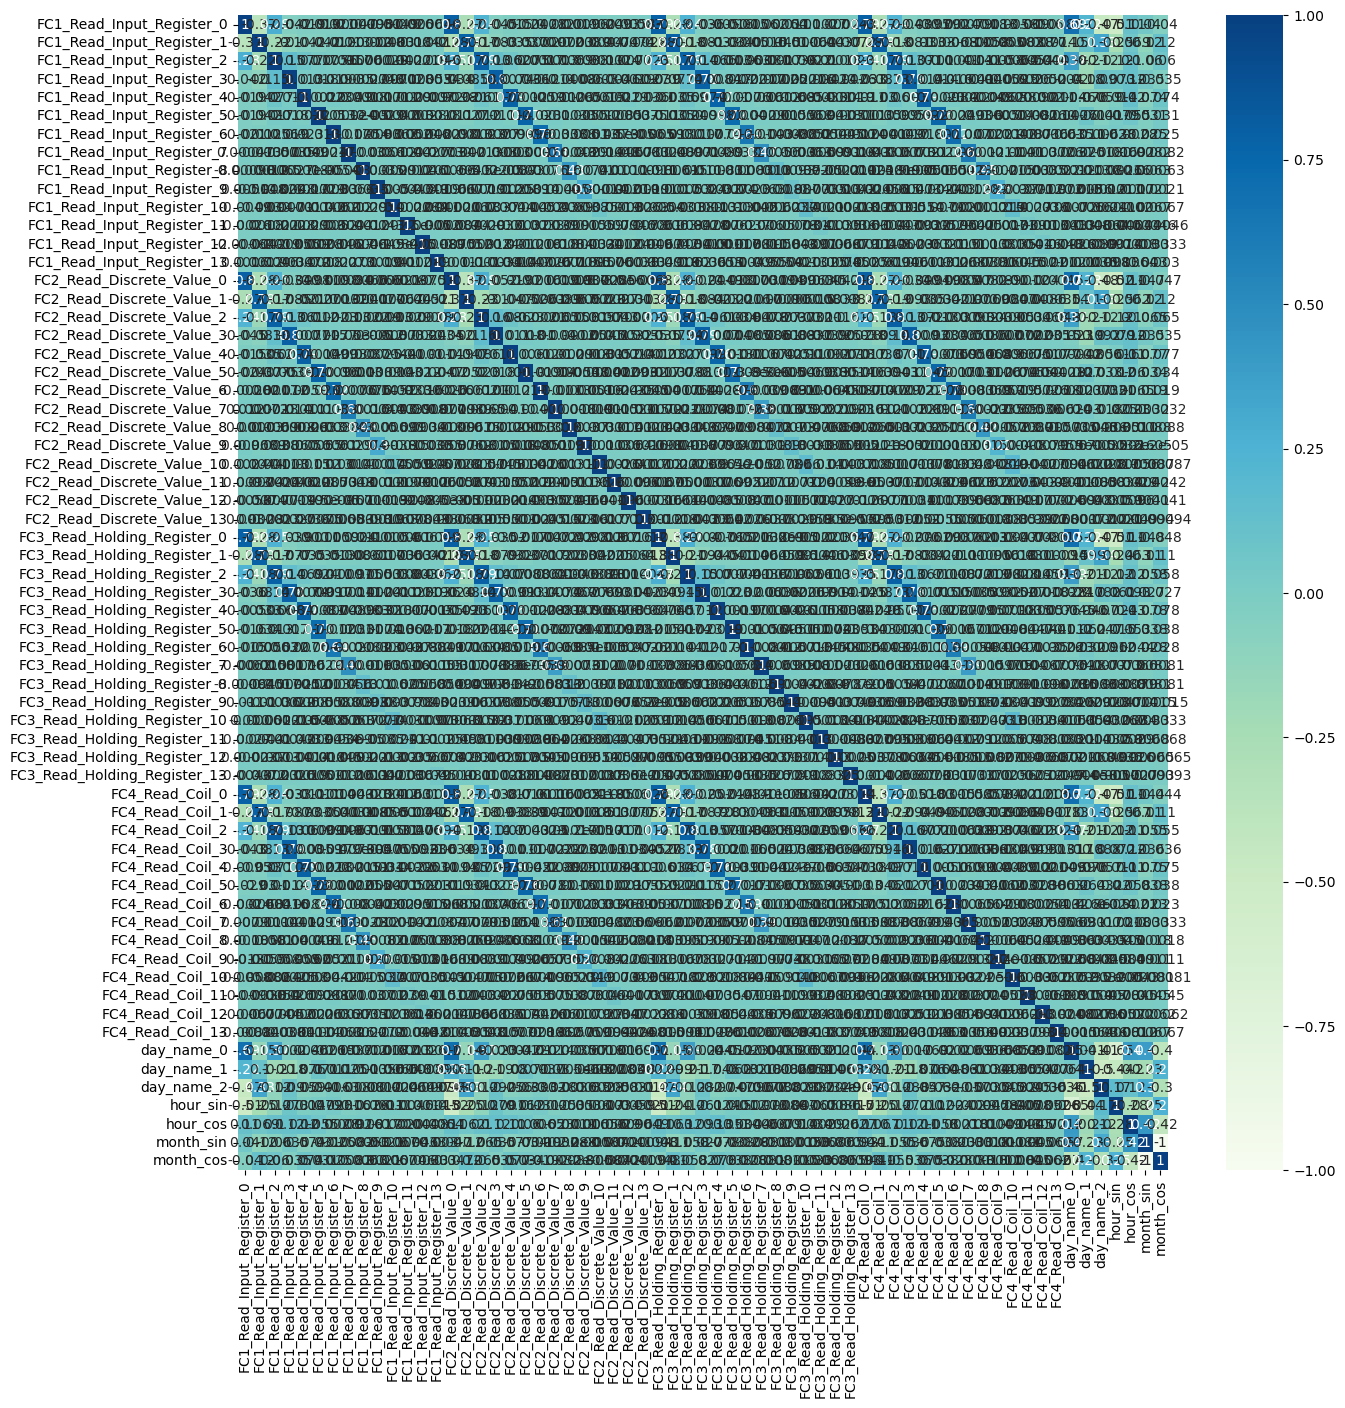

In [38]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [39]:
df = df[[ 
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','day_name_0',
 'day_name_1',
 'day_name_2','FC1_Read_Input_Register_0',
 'FC1_Read_Input_Register_1',
 'FC1_Read_Input_Register_2',
 'FC1_Read_Input_Register_3',
 'FC1_Read_Input_Register_4',
 'FC1_Read_Input_Register_5',
 'FC1_Read_Input_Register_6',
 'FC1_Read_Input_Register_7',
 'FC1_Read_Input_Register_8',
 'FC1_Read_Input_Register_9',
 'FC1_Read_Input_Register_10',
 'FC1_Read_Input_Register_11',
 'FC1_Read_Input_Register_12',
 'FC1_Read_Input_Register_13',
 'FC2_Read_Discrete_Value_0',
 'FC2_Read_Discrete_Value_1',
 'FC2_Read_Discrete_Value_2',
 'FC2_Read_Discrete_Value_3',
 'FC2_Read_Discrete_Value_4',
 'FC2_Read_Discrete_Value_5',
 'FC2_Read_Discrete_Value_6',
 'FC2_Read_Discrete_Value_7',
 'FC2_Read_Discrete_Value_8',
 'FC2_Read_Discrete_Value_9',
 'FC2_Read_Discrete_Value_10',
 'FC2_Read_Discrete_Value_11',
 'FC2_Read_Discrete_Value_12',
 'FC2_Read_Discrete_Value_13',
 'FC3_Read_Holding_Register_0',
 'FC3_Read_Holding_Register_1',
 'FC3_Read_Holding_Register_2',
 'FC3_Read_Holding_Register_3',
 'FC3_Read_Holding_Register_4',
 'FC3_Read_Holding_Register_5',
 'FC3_Read_Holding_Register_6',
 'FC3_Read_Holding_Register_7',
 'FC3_Read_Holding_Register_8',
 'FC3_Read_Holding_Register_9',
 'FC3_Read_Holding_Register_10',
 'FC3_Read_Holding_Register_11',
 'FC3_Read_Holding_Register_12',
 'FC3_Read_Holding_Register_13',
 'FC4_Read_Coil_0',
 'FC4_Read_Coil_1',
 'FC4_Read_Coil_2',
 'FC4_Read_Coil_3',
 'FC4_Read_Coil_4',
 'FC4_Read_Coil_5',
 'FC4_Read_Coil_6',
 'FC4_Read_Coil_7',
 'FC4_Read_Coil_8',
 'FC4_Read_Coil_9',
 'FC4_Read_Coil_10',
 'FC4_Read_Coil_11',
 'FC4_Read_Coil_12',
 'FC4_Read_Coil_13',
 'type'
 ]]

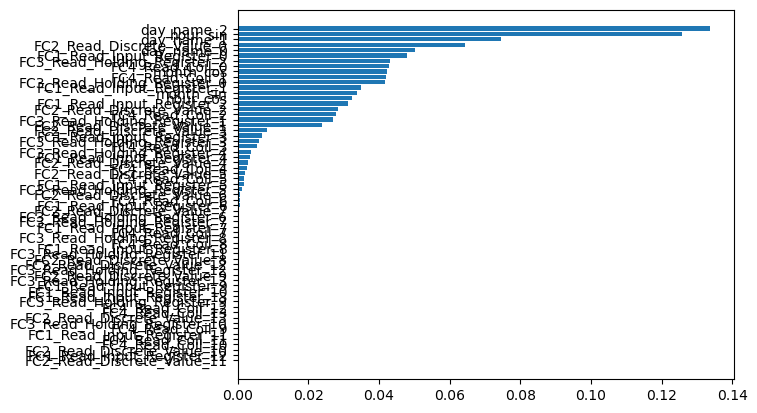

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    backdoor       1.00      0.80      0.89      1500
   injection       1.00      1.00      1.00      1097
      normal       0.95      1.00      0.97      5243
    password       1.00      1.00      1.00      1261
    scanning       1.00      1.00      1.00       159
         xss       1.00      1.00      1.00       149

    accuracy                           0.97      9409
   macro avg       0.99      0.97      0.98      9409
weighted avg       0.97      0.97      0.97      9409



In [42]:
df

,hour_sin,hour_cos,month_sin,month_cos,day_name_0,day_name_1,day_name_2,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,...,FC4_Read_Coil_5,FC4_Read_Coil_6,FC4_Read_Coil_7,FC4_Read_Coil_8,FC4_Read_Coil_9,FC4_Read_Coil_10,FC4_Read_Coil_11,FC4_Read_Coil_12,FC4_Read_Coil_13,type
0,0.866025,-0.500000,1.0,6.123234e-17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,injection
2,0.866025,-0.500000,1.0,6.123234e-17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,injection
3,0.866025,-0.500000,1.0,6.123234e-17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,injection
4,0.866025,-0.500000,1.0,6.123234e-17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,injection
5,0.866025,-0.500000,1.0,6.123234e-17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,injection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,-0.707107,0.707107,1.0,6.123234e-17,1,1,0,1,1,0,...,0,1,1,0,1,0,1,1,0,normal
51102,-0.707107,0.707107,1.0,6.123234e-17,1,1,0,1,1,0,...,0,1,1,0,1,0,1,1,0,normal
51103,-0.707107,0.707107,1.0,6.123234e-17,1,1,0,1,1,0,...,0,1,1,0,1,0,1,1,1,normal
51104,-0.707107,0.707107,1.0,6.123234e-17,1,1,0,1,1,0,...,0,1,1,0,1,0,1,1,1,normal


In [43]:
len(df. columns)

64

In [44]:
#numerical variables for scaling
n = df.iloc[:,:-60]

In [45]:
n.head()

,hour_sin,hour_cos,month_sin,month_cos
0,0.866025,-0.5,1.0,6.123234e-17
2,0.866025,-0.5,1.0,6.123234e-17
3,0.866025,-0.5,1.0,6.123234e-17
4,0.866025,-0.5,1.0,6.123234e-17
5,0.866025,-0.5,1.0,6.123234e-17


In [46]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =[
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos'])

In [47]:
# extracting not scaled features (target feature + categorical features)
extracted_col= df[['day_name_0',
 'day_name_1',
 'day_name_2','FC1_Read_Input_Register_0',
 'FC1_Read_Input_Register_1',
 'FC1_Read_Input_Register_2',
 'FC1_Read_Input_Register_3',
 'FC1_Read_Input_Register_4',
 'FC1_Read_Input_Register_5',
 'FC1_Read_Input_Register_6',
 'FC1_Read_Input_Register_7',
 'FC1_Read_Input_Register_8',
 'FC1_Read_Input_Register_9',
 'FC1_Read_Input_Register_10',
 'FC1_Read_Input_Register_11',
 'FC1_Read_Input_Register_12',
 'FC1_Read_Input_Register_13',
 'FC2_Read_Discrete_Value_0',
 'FC2_Read_Discrete_Value_1',
 'FC2_Read_Discrete_Value_2',
 'FC2_Read_Discrete_Value_3',
 'FC2_Read_Discrete_Value_4',
 'FC2_Read_Discrete_Value_5',
 'FC2_Read_Discrete_Value_6',
 'FC2_Read_Discrete_Value_7',
 'FC2_Read_Discrete_Value_8',
 'FC2_Read_Discrete_Value_9',
 'FC2_Read_Discrete_Value_10',
 'FC2_Read_Discrete_Value_11',
 'FC2_Read_Discrete_Value_12',
 'FC2_Read_Discrete_Value_13',
 'FC3_Read_Holding_Register_0',
 'FC3_Read_Holding_Register_1',
 'FC3_Read_Holding_Register_2',
 'FC3_Read_Holding_Register_3',
 'FC3_Read_Holding_Register_4',
 'FC3_Read_Holding_Register_5',
 'FC3_Read_Holding_Register_6',
 'FC3_Read_Holding_Register_7',
 'FC3_Read_Holding_Register_8',
 'FC3_Read_Holding_Register_9',
 'FC3_Read_Holding_Register_10',
 'FC3_Read_Holding_Register_11',
 'FC3_Read_Holding_Register_12',
 'FC3_Read_Holding_Register_13',
 'FC4_Read_Coil_0',
 'FC4_Read_Coil_1',
 'FC4_Read_Coil_2',
 'FC4_Read_Coil_3',
 'FC4_Read_Coil_4',
 'FC4_Read_Coil_5',
 'FC4_Read_Coil_6',
 'FC4_Read_Coil_7',
 'FC4_Read_Coil_8',
 'FC4_Read_Coil_9',
 'FC4_Read_Coil_10',
 'FC4_Read_Coil_11',
 'FC4_Read_Coil_12',
 'FC4_Read_Coil_13',
 'type']]
#standardized_df = robust_df.join(extracted_col)

In [48]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)


In [49]:
df_all = pd.concat([robust_df,extracted_col], axis = 1)

In [50]:
df.all

<bound method NDFrame._add_numeric_operations.<locals>.all of        hour_sin  hour_cos  month_sin     month_cos  day_name_0  day_name_1  \
0      0.866025 -0.500000        1.0  6.123234e-17           0           0   
2      0.866025 -0.500000        1.0  6.123234e-17           0           0   
3      0.866025 -0.500000        1.0  6.123234e-17           0           0   
4      0.866025 -0.500000        1.0  6.123234e-17           0           0   
5      0.866025 -0.500000        1.0  6.123234e-17           0           0   
...         ...       ...        ...           ...         ...         ...   
51101 -0.707107  0.707107        1.0  6.123234e-17           1           1   
51102 -0.707107  0.707107        1.0  6.123234e-17           1           1   
51103 -0.707107  0.707107        1.0  6.123234e-17           1           1   
51104 -0.707107  0.707107        1.0  6.123234e-17           1           1   
51105 -0.707107  0.707107        1.0  6.123234e-17           1           1   

 

In [51]:
#len(df_all. columns)

In [52]:
#len(robust_df. columns)

In [53]:
#df_all.label.unique()

In [54]:
#extracted_col.day_name_0.unique()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = df_all.iloc[:,:-1]
y = df_all["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


              precision    recall  f1-score   support

    backdoor       1.00      1.00      1.00      1500
   injection       1.00      1.00      1.00      1097
      normal       1.00      1.00      1.00      5243
    password       1.00      1.00      1.00      1261
    scanning       1.00      1.00      1.00       159
         xss       1.00      1.00      1.00       149

    accuracy                           1.00      9409
   macro avg       1.00      1.00      1.00      9409
weighted avg       1.00      1.00      1.00      9409



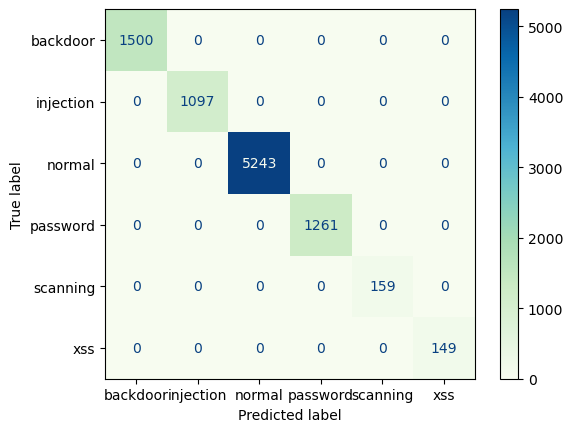

In [56]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

#classificatiion report
print(classification_report(y_test, y_pred))


In [57]:
### 4. Model Evaluation  ###
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))

NameError: name 'reg' is not defined

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

In [ ]:
# recall
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

In [ ]:
# precision
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)